<a href="https://colab.research.google.com/github/Pedrobvivas/AnaliseDados/blob/main/Migra%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

dados = pd.read_csv('imigrantes_canada.csv')
dados.set_index('País', inplace = True)


anos = list(map(str,range(1980, 2014)))
brasil = dados.loc['Brasil', anos]


brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


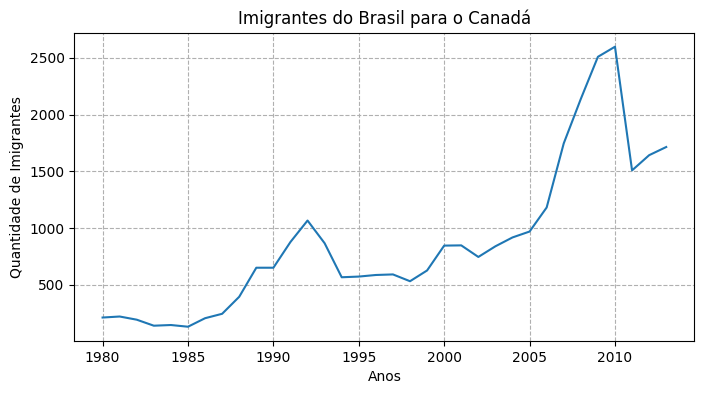

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title("Imigrantes do Brasil para o Canadá")
ax.set_xlabel("Anos")
ax.set_ylabel("Quantidade de Imigrantes")
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--')

#Para salvar
#fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

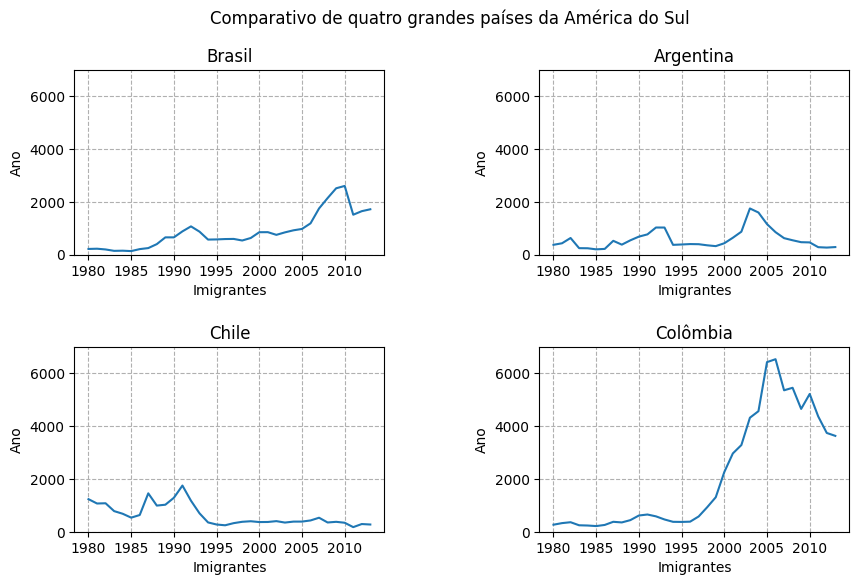

In [5]:
fig, axs = plt.subplots(2,2, figsize = (10,6))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
fig.suptitle("Comparativo de quatro grandes países da América do Sul")

axs[0,0].plot(dados.loc['Brasil', anos])
axs[0,0].set_title("Brasil")

axs[0,1].plot(dados.loc['Argentina', anos])
axs[0,1].set_title("Argentina")

axs[1,0].plot(dados.loc['Chile', anos])
axs[1,0].set_title("Chile")

axs[1,1].plot(dados.loc['Colômbia', anos])
axs[1,1].set_title("Colômbia")

ymin = 0
ymax = 7000

#Ajustando o intervalo das datas e setando os nomes
for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.set_xlabel("Imigrantes")
  ax.set_ylabel("Ano")
  ax.grid(linestyle='--')

#Ajustando a quantidade maxima de anos na linha Y
for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

#Para salvar
#fig.savefig('comparativo_imigracao_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

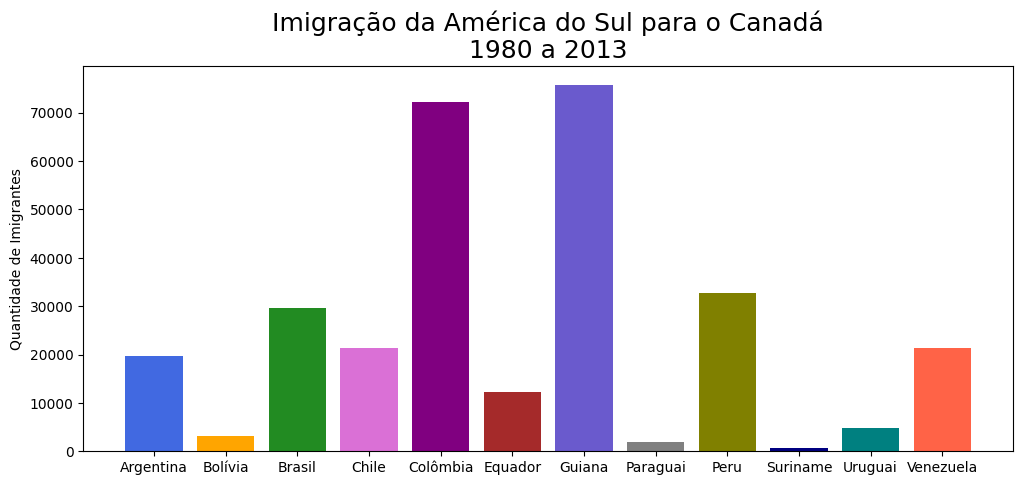

In [6]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown',
'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

america_sul = dados.query('Região  == "América do Sul"')

fig, ax = plt.subplots(figsize = (12,5))
ax.bar(america_sul.index, america_sul['Total'], color = cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Quantidade de Imigrantes')

#Para salvar
#fig.savefig('imigracao_americaSul_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

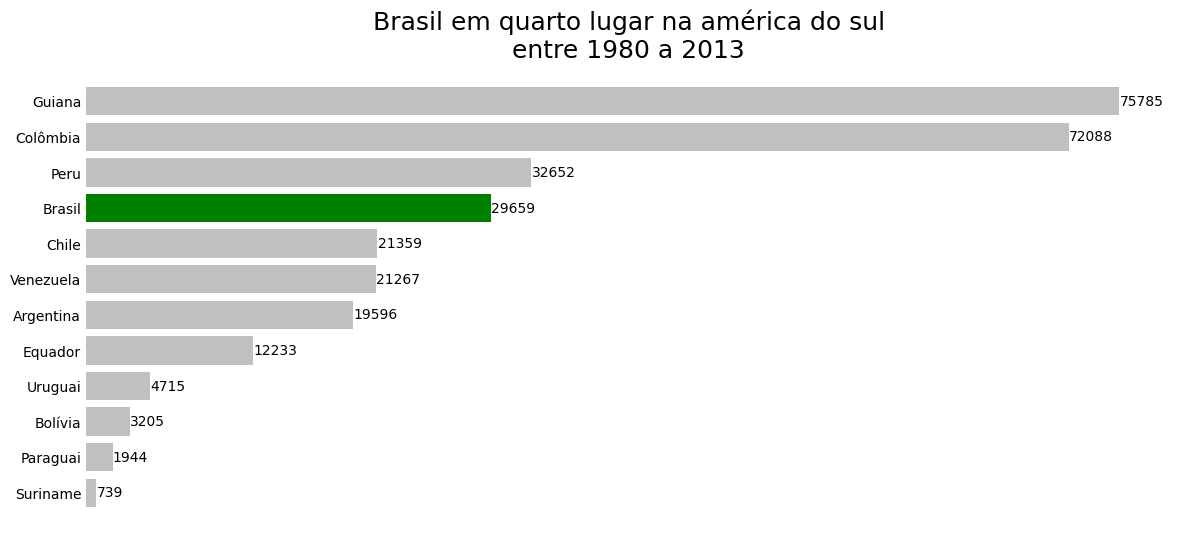

In [7]:
america_sul_sorted = america_sul.sort_values('Total', ascending = True)

cores = []

for pais in america_sul_sorted.index:
      if pais == 'Brasil':
        cores.append('green')
      else:
        cores.append('silver')

america_sul = dados.query('Região  == "América do Sul"')

fig, ax = plt.subplots(figsize = (14,6))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color = cores)
ax.set_title('Brasil em quarto lugar na américa do sul\nentre 1980 a 2013', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Quantidade de Imigrantes')

for i, v in enumerate(america_sul_sorted['Total']):
  ax.text(v + 20, i, str(v), color = 'black', fontsize = 10, ha = 'left', va = 'center')

#Deixando mais limpo
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

#Para salvar
#fig.savefig('comparativo_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

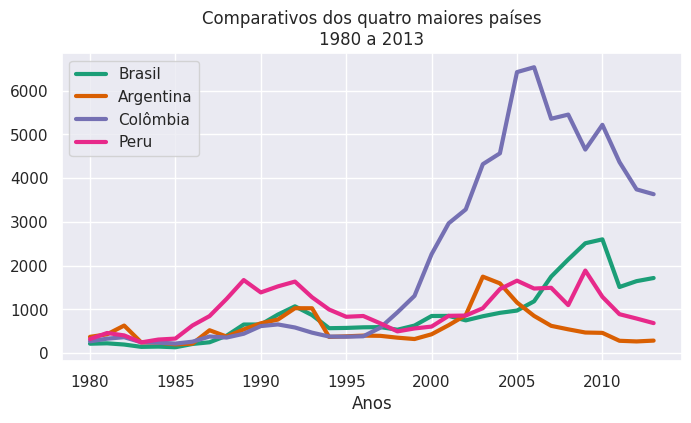

In [8]:
import seaborn as sns

sns.set_theme()
sns.set_palette('Dark2')

fig, ax = plt.subplots(figsize = (8,4))


ax = sns.lineplot(dados.loc['Brasil', anos], label='Brasil', lw=3)
ax = sns.lineplot(dados.loc['Argentina', anos], label='Argentina', lw=3)
ax = sns.lineplot(dados.loc['Colômbia', anos], label = 'Colômbia', lw=3)
ax = sns.lineplot(dados.loc['Peru', anos], label = 'Peru', lw=3)

ax.set_title("Comparativos dos quatro maiores países\n1980 a 2013")
ax.set_xlabel("Anos")
ax.set_ylabel("")
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

In [23]:
#Criando gráficos dinâmicos, é possivel selecionar os países
import plotly.express as px

dados_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis = 1)

america_sul_final = dados_america_sul_clean.T

fig = px.line(america_sul_final, x= america_sul_final.index, y= america_sul_final.columns, color = 'País',
              title="Quantidade de Imigrantes por País", markers = True)

fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title="Ano",
    yaxis_title="Quantidade"
)

fig.show()

# É possivel salvar em HTML para aprensentação conforme abaixo!
#fig.write_html('imigracao_america_sul.html')